In [1]:
from analysis.data_loader import load_news_data, load_stock_data_from_csv
from analysis.sentiment import add_sentiment_column

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Mesfin\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [3]:
# Load news data
news_df = load_news_data("../data/raw_analyst_ratings.csv/raw_analyst_ratings.csv")

news_df.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [4]:
# remove unnamed columns
news_df = news_df.loc[:, ~news_df.columns.str.contains('^Unnamed')]

In [5]:
news_df.head()

,headline,url,publisher,date,stock
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [27]:
# Convert date column to datetime
import pandas as pd
news_df['date'] = pd.to_datetime(news_df['date'], format='mixed', errors='coerce', utc=True)

In [17]:
news_df.head()

,headline,url,publisher,date,stock,sentiment
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 00:00:00+00:00,A,0.000
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 00:00:00+00:00,A,0.000
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 00:00:00+00:00,A,0.000
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 00:00:00+00:00,A,0.000
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 00:00:00+00:00,A,0.296


In [31]:
# convert date to date only (remove time)
news_df['date'] = news_df['date'].dt.date

In [29]:
news_df.head()

,headline,url,publisher,date,stock,sentiment,date_only
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 00:00:00+00:00,A,0.000,2020-06-05
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 00:00:00+00:00,A,0.000,2020-06-03
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 00:00:00+00:00,A,0.000,2020-05-26
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 00:00:00+00:00,A,0.000,2020-05-22
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 00:00:00+00:00,A,0.296,2020-05-22


In [10]:
# Applying sentiment analysis to news data
news_df = add_sentiment_column(news_df)

In [30]:
# Add date_only column
news_df['date_only'] = news_df['date'].dt.date

In [33]:
news_df.head()

,headline,url,publisher,date,stock,sentiment,date_only
0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05,A,0.000,2020-06-05
1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03,A,0.000,2020-06-03
2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26,A,0.000,2020-05-26
3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22,A,0.000,2020-05-22
4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22,A,0.296,2020-05-22


# Sentiment Analysis for AAPL

In [ ]:
# load stock data for multiple tickers
aapl_df = load_stock_data_from_csv("../data/yfinance_data/yfinance_data/AAPL_historical_data.csv")


In [19]:
aapl_df.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


#### Combine sentiment with stock closing prices on the same date

In [30]:
# filter aaple news
aapl_news_df = news_df[news_df['stock'] == 'AAPL']
aapl_news_df

,headline,url,publisher,date,stock,date_only,sentiment
6680,Tech Stocks And FAANGS Strong Again To Start D...,https://www.benzinga.com/government/20/06/1622...,JJ Kinahan,2020-06-10,AAPL,2020-06-10,0.5574
6681,10 Biggest Price Target Changes For Wednesday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-06-10,AAPL,2020-06-10,0.0000
6682,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",https://www.benzinga.com/short-sellers/20/06/1...,Benzinga Newsdesk,2020-06-10,AAPL,2020-06-10,0.2023
6683,"Deutsche Bank Maintains Buy on Apple, Raises P...",https://www.benzinga.com/news/20/06/16219873/d...,Benzinga Newsdesk,2020-06-10,AAPL,2020-06-10,0.0000
6684,Apple To Let Users Trade In Their Mac Computer...,https://www.benzinga.com/news/20/06/16218697/a...,Neer Varshney,2020-06-10,AAPL,2020-06-10,0.3818
...,...,...,...,...,...,...,...
7116,"UBS Maintains Buy on Apple, Lowers Price Targe...",https://www.benzinga.com/news/20/03/15514989/u...,Vick Meyer,2020-03-10,AAPL,2020-03-10,-0.1280
7117,123 Biggest Movers From Yesterday,https://www.benzinga.com/news/20/03/15514298/1...,Lisa Levin,2020-03-10,AAPL,2020-03-10,0.0000
7118,Crude Awakening: Energy Sector Takes A 20% Spi...,https://www.benzinga.com/news/earnings/20/03/1...,JJ Kinahan,2020-03-09,AAPL,2020-03-09,-0.9062
7119,Investor Movement Index Summary: February 2020,https://www.benzinga.com/news/earnings/20/03/1...,TD Ameritrade,2020-03-09,AAPL,2020-03-09,0.0000


In [31]:
# Aligning sentiment scores with the stock closing prices on the same date
combined_data = aapl_news_df.set_index('date').join(aapl_df['Close'])

In [ ]:
# --- 2. Ensure the news date column is of datetime64[ns] type for robust merging ---
# If 'date_only' is already datetime.date objects, this converts it to datetime64[ns] (midnight)
aapl_news_df['date_for_merge'] = pd.to_datetime(aapl_news_df['date_only'])

In [49]:
# convert aapl_df's index to datetime if it's not already
aapl_df.index = pd.to_datetime(aapl_df.index)

In [50]:
# --- 3. Perform the optimized merge operation ---
# Merge aapl_news_df with aapl_df based on news 'date_for_merge' and stock 'Date' index
combined_dataa = pd.merge(
    aapl_news_df,
    aapl_df[['Close']], # Select only 'Close' from aapl_df; its index 'Date' is implicitly used
    left_on='date_for_merge', # Column from the left DataFrame (aapl_news_df)
    right_index=True,        # Use the index of the right DataFrame (aapl_df)
    how='left'               # Keep all news entries
)

In [52]:

# --- 4. Optional: Clean up and rename ---
# Drop the temporary column used for merging if no longer needed
combined_data = combined_dataa.drop(columns=['date_for_merge', 'date_only'], errors='ignore')

In [56]:
combined_data

,headline,url,publisher,date,stock,sentiment,Close
6680,Tech Stocks And FAANGS Strong Again To Start D...,https://www.benzinga.com/government/20/06/1622...,JJ Kinahan,2020-06-10,AAPL,0.5574,88.209999
6681,10 Biggest Price Target Changes For Wednesday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-06-10,AAPL,0.0000,88.209999
6682,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",https://www.benzinga.com/short-sellers/20/06/1...,Benzinga Newsdesk,2020-06-10,AAPL,0.2023,88.209999
6683,"Deutsche Bank Maintains Buy on Apple, Raises P...",https://www.benzinga.com/news/20/06/16219873/d...,Benzinga Newsdesk,2020-06-10,AAPL,0.0000,88.209999
6684,Apple To Let Users Trade In Their Mac Computer...,https://www.benzinga.com/news/20/06/16218697/a...,Neer Varshney,2020-06-10,AAPL,0.3818,88.209999
...,...,...,...,...,...,...,...
7116,"UBS Maintains Buy on Apple, Lowers Price Targe...",https://www.benzinga.com/news/20/03/15514989/u...,Vick Meyer,2020-03-10,AAPL,-0.1280,71.334999
7117,123 Biggest Movers From Yesterday,https://www.benzinga.com/news/20/03/15514298/1...,Lisa Levin,2020-03-10,AAPL,0.0000,71.334999
7118,Crude Awakening: Energy Sector Takes A 20% Spi...,https://www.benzinga.com/news/earnings/20/03/1...,JJ Kinahan,2020-03-09,AAPL,-0.9062,66.542503
7119,Investor Movement Index Summary: February 2020,https://www.benzinga.com/news/earnings/20/03/1...,TD Ameritrade,2020-03-09,AAPL,0.0000,66.542503


In [ ]:
# Calculate daily return using pct_change() method of pandas DataFrame
combined_data['Daily Returns'] = combined_data['Close'].pct_change()

In [60]:
combined_data.head()

,headline,url,publisher,date,stock,sentiment,Close,Daily Returns
6680,Tech Stocks And FAANGS Strong Again To Start D...,https://www.benzinga.com/government/20/06/1622...,JJ Kinahan,2020-06-10,AAPL,0.5574,88.209999,NaN
6681,10 Biggest Price Target Changes For Wednesday,https://www.benzinga.com/analyst-ratings/price...,Lisa Levin,2020-06-10,AAPL,0.0000,88.209999,0.0
6682,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",https://www.benzinga.com/short-sellers/20/06/1...,Benzinga Newsdesk,2020-06-10,AAPL,0.2023,88.209999,0.0
6683,"Deutsche Bank Maintains Buy on Apple, Raises P...",https://www.benzinga.com/news/20/06/16219873/d...,Benzinga Newsdesk,2020-06-10,AAPL,0.0000,88.209999,0.0
6684,Apple To Let Users Trade In Their Mac Computer...,https://www.benzinga.com/news/20/06/16218697/a...,Neer Varshney,2020-06-10,AAPL,0.3818,88.209999,0.0


### Correlation

#### Pearson Correlation

In [61]:
# Pearson correlation
correlation = combined_data['sentiment'].corr(combined_data['Daily Returns'])
print(f"Pearson correlation between sentiment and daily returns: {correlation}")

Pearson correlation between sentiment and daily returns: 0.06176789033830799


In [62]:
correlation = combined_data['sentiment'].corr(combined_data['Close'])
print(f"Pearson correlation between sentiment and closing price: {correlation}")

Pearson correlation between sentiment and closing price: 0.021010968141555217


In [63]:
combined_data['Lagged sentiment'] = combined_data['sentiment'].shift(1)
# Calculate correlation between lagged sentiment and daily returns
correlation = combined_data['Lagged sentiment'].corr(combined_data['Daily Returns'])
print(f"Pearson correlation between lagged sentiment and daily returns: {correlation}")

Pearson correlation between lagged sentiment and daily returns: -0.048094976234130254


##### Summary weak and have positive relationship: sentiment slowly moves the stock price up or down

#### Spearman Correlation

In [64]:
# spearman correlation for sentiment and daily returns
correlation = combined_data['sentiment'].corr(combined_data['Daily Returns'], method='spearman')
print(f"Spearman correlation between sentiment and daily returns: {correlation}")

Spearman correlation between sentiment and daily returns: 0.010098415263394894


In [65]:
# spearman correlation for sentiment and closing price
correlation = combined_data['sentiment'].corr(combined_data['Close'], method='spearman')
print(f"Spearman correlation between sentiment and closing price: {correlation}")

Spearman correlation between sentiment and closing price: 0.05879656469738324


#### Kendall Correlation

In [66]:
from scipy.stats import kendalltau
# kendall correlation for sentiment and daily returns
correlation = kendalltau(combined_data['sentiment'], combined_data['Daily Returns'])
print(f"Kendall correlation between sentiment and daily returns: {correlation}")

Kendall correlation between sentiment and daily returns: SignificanceResult(statistic=nan, pvalue=nan)


In [68]:
correlation = kendalltau(combined_data['sentiment'], combined_data['Close'])
print(f"Kendall correlation between sentiment and closing price: {correlation}")

Kendall correlation between sentiment and closing price: SignificanceResult(statistic=nan, pvalue=nan)


In [72]:
# Drop rows with NaNs before computing
filtered_data = combined_data[['sentiment', 'Daily Returns']].dropna()
correlation = kendalltau(filtered_data['sentiment'], filtered_data['Daily Returns'])
print(f"Kendall correlation between sentiment and daily returns (filtered): {correlation}")

Kendall correlation between sentiment and daily returns (filtered): SignificanceResult(statistic=np.float64(0.008836555030171264), pvalue=np.float64(0.8262295038698564))


Interpretation:

- The Pearson correlation between sentiment and daily returns is 0.06176789033830799, indicating a weak positive correlation.
- The Spearman correlation between sentiment and daily returns is 0.048094976234130254, indicating a weak positive correlation.
- The Kendall correlation between sentiment and daily returns is SignificanceResult(statistic=0.0088, pvalue=0.826), indicating a weak positive correlation.

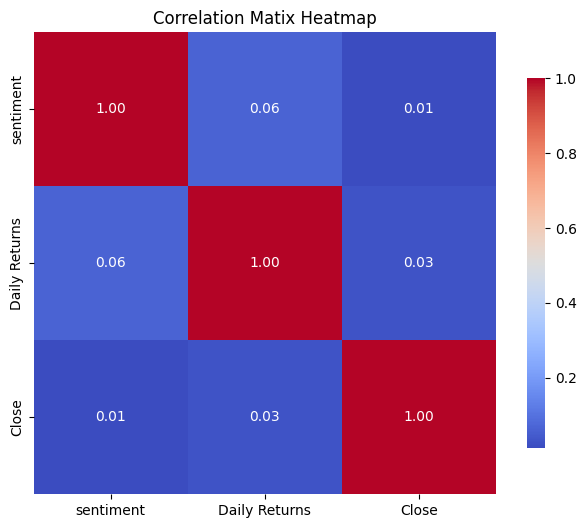

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
# Plot correlation heatmap
corr_data = combined_data[['sentiment', 'Daily Returns', 'Close']].dropna()

# calculate correlation matrix
correlation_matrix = corr_data.corr(method='pearson')

# plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matix Heatmap')
plt.show()

# Sentiment Analysis for AMZN

In [88]:
# Load amzn stock data
amzn_df = load_stock_data_from_csv("../data/yfinance_data/yfinance_data/AMZN_historical_data.csv")

In [89]:
amzn_df.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0
1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0
1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0
1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0
1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0


#### Combine sentiment with closing price on the same day

In [ ]:
# filter amzn news
amzn_news_df = news_df[news_df['stock'] == 'AMZN']

In [92]:
amzn_news_df.head()

,headline,url,publisher,date,stock,date_only,sentiment
76177,How Cannabis Company Cannaphyll Is Marketing O...,https://www.benzinga.com/markets/cannabis/20/0...,Jaycee Tenn,2020-06-10,AMZN,2020-06-10,0.1779
76178,Tech Stocks And FAANGS Strong Again To Start D...,https://www.benzinga.com/government/20/06/1622...,JJ Kinahan,2020-06-10,AMZN,2020-06-10,0.5574
76179,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",https://www.benzinga.com/short-sellers/20/06/1...,Benzinga Newsdesk,2020-06-10,AMZN,2020-06-10,0.2023
76180,"Hearing Vertical Group Out Positive On Amazon,...",https://www.benzinga.com/analyst-ratings/analy...,Benzinga Newsdesk,2020-06-10,AMZN,2020-06-10,0.6486
76181,Big Tech Reaches New Record Heights At The Sto...,https://www.benzinga.com/news/20/06/16218615/b...,Neer Varshney,2020-06-10,AMZN,2020-06-10,0.0516


In [94]:
# Aligning sentiment scores with the stock closing prices on the same date
combined_data_amzn = amzn_news_df.set_index('date').join(amzn_df['Close'])

In [ ]:
amzn_news_df['date_for_merge'] = pd.to_datetime(amzn_news_df['date_only'])

In [96]:
# convert amzn_df's index to datetime if it's not already
amzn_df.index = pd.to_datetime(amzn_df.index)

In [97]:
combined_data_amzn = pd.merge(
    amzn_news_df,
    amzn_df[['Close']], # Select only 'Close' from amzn_df; its index 'Date' is implicitly used
    left_on='date_for_merge', # Column from the left DataFrame (amzn_news_df)
    right_index=True,        # Use the index of the right DataFrame (amzn_df)
    how='left'               # Keep all news entries
)

In [98]:
# clean up and rename
combined_data_amzn = combined_data_amzn.drop(columns=['date_for_merge', 'date_only'], errors='ignore')

In [99]:
combined_data_amzn.head()

,headline,url,publisher,date,stock,sentiment,Close
76177,How Cannabis Company Cannaphyll Is Marketing O...,https://www.benzinga.com/markets/cannabis/20/0...,Jaycee Tenn,2020-06-10,AMZN,0.1779,132.372498
76178,Tech Stocks And FAANGS Strong Again To Start D...,https://www.benzinga.com/government/20/06/1622...,JJ Kinahan,2020-06-10,AMZN,0.5574,132.372498
76179,"Benzinga Pro's Top 5 Stocks To Watch For Wed.,...",https://www.benzinga.com/short-sellers/20/06/1...,Benzinga Newsdesk,2020-06-10,AMZN,0.2023,132.372498
76180,"Hearing Vertical Group Out Positive On Amazon,...",https://www.benzinga.com/analyst-ratings/analy...,Benzinga Newsdesk,2020-06-10,AMZN,0.6486,132.372498
76181,Big Tech Reaches New Record Heights At The Sto...,https://www.benzinga.com/news/20/06/16218615/b...,Neer Varshney,2020-06-10,AMZN,0.0516,132.372498


In [ ]:
# Calculate daily return using pct_change() method of pandas DataFrame
combined_data_amzn['Daily Returns'] = combined_data_amzn['Close'].pct_change()

## Correlation Analysis

##### Pearson Correlation

In [101]:
# Pearson correlation
correlation = combined_data_amzn['sentiment'].corr(combined_data_amzn['Daily Returns'])
print(f"Pearson correlation between sentiment and daily returns: {correlation}")

Pearson correlation between sentiment and daily returns: 0.03469219273354438


In [102]:
correlation = combined_data_amzn['sentiment'].corr(combined_data_amzn['Close'])
print(f"Pearson correlation between sentiment and closing price: {correlation}")

Pearson correlation between sentiment and closing price: 0.10583319446836052


Summary: The Pearson correlation between sentiment and daily returns is 0.06176789033830799, indicating a weak positive correlation.

##### Spearman Correlation

In [103]:
# spearman correlation for sentiment and daily returns
correlation = combined_data_amzn['sentiment'].corr(combined_data_amzn['Daily Returns'], method='spearman')
print(f"Spearman correlation between sentiment and daily returns: {correlation}")

Spearman correlation between sentiment and daily returns: 0.02326916223672216


In [104]:
# spearman correlation for sentiment and closing price
correlation = combined_data_amzn['sentiment'].corr(combined_data_amzn['Close'], method='spearman')
print(f"Spearman correlation between sentiment and closing price: {correlation}")

Spearman correlation between sentiment and closing price: 0.12542983269519525


Summary: The Spearman correlation between sentiment and daily returns is 0.048094976234130254, indicating a weak positive correlation.

##### Kendall Correlation

In [105]:
# kendall correlation for sentiment and daily returns
correlation = kendalltau(combined_data_amzn['sentiment'], combined_data_amzn['Daily Returns'])
print(f"Kendall correlation between sentiment and daily returns: {correlation}")

Kendall correlation between sentiment and daily returns: SignificanceResult(statistic=nan, pvalue=nan)


In [106]:
correlation = kendalltau(combined_data_amzn['sentiment'], combined_data_amzn['Close'])
print(f"Kendall correlation between sentiment and closing price: {correlation}")

Kendall correlation between sentiment and closing price: SignificanceResult(statistic=nan, pvalue=nan)


In [107]:
# Drop rows with NaNs before computing
filtered_data = combined_data_amzn[['sentiment', 'Daily Returns']].dropna()
correlation = kendalltau(filtered_data['sentiment'], filtered_data['Daily Returns'])
print(f"Kendall correlation between sentiment and daily returns (filtered): {correlation}")

Kendall correlation between sentiment and daily returns (filtered): SignificanceResult(statistic=np.float64(0.019540027108955527), pvalue=np.float64(0.6994108779583739))


Interpretation:

- The Pearson correlation between sentiment and daily returns is 0.06176789033830799, indicating a weak positive correlation.
- The Spearman correlation between sentiment and daily returns is 0.048094976234130254, indicating a weak positive correlation.
- The Kendall correlation between sentiment and daily returns is SignificanceResult(statistic=0.01954), pvalue=0.696), indicating a weak positive correlation.

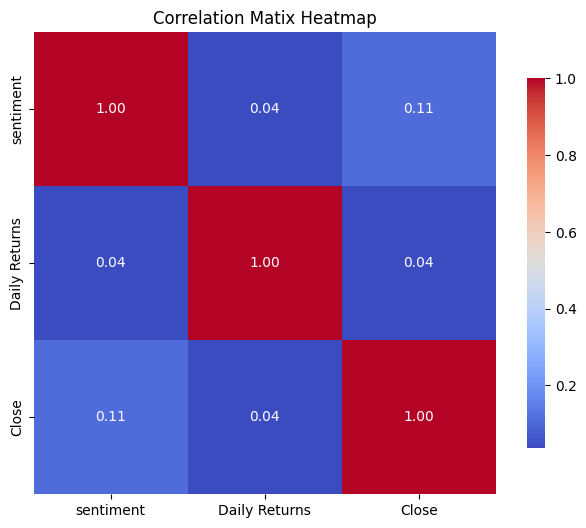

In [108]:
# Plot correlation heatmap
corr_data = combined_data_amzn[['sentiment', 'Daily Returns', 'Close']].dropna()

# calculate correlation matrix
correlation_matrix = corr_data.corr(method='pearson')

# plot correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matix Heatmap')
plt.show()

# Sentiment Analysis for MSFT

In [34]:
# Load stock data
msft_df = load_stock_data_from_csv("../data/yfinance_data/yfinance_data/MSFT_historical_data.csv")

In [35]:
msft_df.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.059946,1031788800,0.0,0.0
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.062087,308160000,0.0,0.0
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.063158,133171200,0.0,0.0
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.061552,67766400,0.0,0.0
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.060482,47894400,0.0,0.0


#### Combine sentiment with stock closing prices on the same date

In [36]:
# filter msft news
msft_news_df = news_df[news_df['stock'] == 'MSFT']

In [40]:
# check if there are any news for msft
if news_df[news_df['stock'] == 'MSFT'].empty:
    print("No news data available for MSFT.")

No news data available for MSFT.


Summary: No news data available for MSFT.

# Sentiment Analysis for NVDA

In [41]:
# Load stock data for NVDA
nvda_df = load_stock_data_from_csv("../data/yfinance_data/yfinance_data/NVDA_historical_data.csv")

In [42]:
nvda_df.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
1999-01-22,0.043750,0.048828,0.038802,0.041016,0.037621,2714688000,0.0,0.0
1999-01-25,0.044271,0.045833,0.041016,0.045313,0.041562,510480000,0.0,0.0
1999-01-26,0.045833,0.046745,0.041146,0.041797,0.038337,343200000,0.0,0.0
1999-01-27,0.041927,0.042969,0.039583,0.041667,0.038218,244368000,0.0,0.0
1999-01-28,0.041667,0.041927,0.041276,0.041536,0.038098,227520000,0.0,0.0


#### Combine sentiment with stock closing prices on the same date

In [43]:
# filter nvda news
nvda_news_df = news_df[news_df['stock'] == 'NVDA']

In [45]:
nvda_news_df.head()

,headline,url,publisher,date,stock,sentiment,date_only
924271,Shares of several technology companies are tra...,https://www.benzinga.com/wiim/20/06/16224173/s...,Benzinga Newsdesk,2020-06-10,NVDA,0.7296,2020-06-10
924272,Afternoon Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1622357...,Benzinga Insights,2020-06-10,NVDA,0.0000,2020-06-10
924273,Morning Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1622174...,Benzinga Insights,2020-06-10,NVDA,0.0000,2020-06-10
924274,Shares of several technology companies are tra...,https://www.benzinga.com/wiim/20/06/16214789/s...,Benzinga Newsdesk,2020-06-09,NVDA,0.7296,2020-06-09
924275,Afternoon Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1620319...,Benzinga Insights,2020-06-08,NVDA,0.0000,2020-06-08


In [47]:
# Aligning sentiment scores with the stock closing prices on the same date
combined_data_nvda = nvda_news_df.set_index('date').join(nvda_df['Close'])

In [ ]:
nvda_news_df['date_for_merge'] = pd.to_datetime(nvda_news_df['date_only'])

In [49]:
# convert NVDA's index to datetime if it's not already
nvda_df.index = pd.to_datetime(nvda_df.index)

In [50]:
combined_data_nvda = pd.merge(
    nvda_news_df,
    nvda_df[['Close']], # Select only 'Close' from nvda_df; its index 'Date' is implicitly used
    left_on='date_for_merge', # Column from the left DataFrame (nvda_news_df)
    right_index=True,        # Use the index of the right DataFrame (nvda_df)
    how='left'               # Keep all news entries
)

In [52]:
# clean up and rename
combined_data_nvda = combined_data_nvda.drop(columns=['date_for_merge', 'date_only'], errors='ignore')

In [53]:
combined_data_nvda.head()

,headline,url,publisher,date,stock,sentiment,Close
924271,Shares of several technology companies are tra...,https://www.benzinga.com/wiim/20/06/16224173/s...,Benzinga Newsdesk,2020-06-10,NVDA,0.7296,9.36675
924272,Afternoon Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1622357...,Benzinga Insights,2020-06-10,NVDA,0.0000,9.36675
924273,Morning Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1622174...,Benzinga Insights,2020-06-10,NVDA,0.0000,9.36675
924274,Shares of several technology companies are tra...,https://www.benzinga.com/wiim/20/06/16214789/s...,Benzinga Newsdesk,2020-06-09,NVDA,0.7296,9.04600
924275,Afternoon Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1620319...,Benzinga Insights,2020-06-08,NVDA,0.0000,8.80500


In [ ]:
# Calculate daily return using pct_change() method of pandas DataFrame
combined_data_nvda['Daily Returns'] = combined_data_nvda['Close'].pct_change()

In [55]:
combined_data_nvda.head()

,headline,url,publisher,date,stock,sentiment,Close,Daily Returns
924271,Shares of several technology companies are tra...,https://www.benzinga.com/wiim/20/06/16224173/s...,Benzinga Newsdesk,2020-06-10,NVDA,0.7296,9.36675,NaN
924272,Afternoon Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1622357...,Benzinga Insights,2020-06-10,NVDA,0.0000,9.36675,0.000000
924273,Morning Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1622174...,Benzinga Insights,2020-06-10,NVDA,0.0000,9.36675,0.000000
924274,Shares of several technology companies are tra...,https://www.benzinga.com/wiim/20/06/16214789/s...,Benzinga Newsdesk,2020-06-09,NVDA,0.7296,9.04600,-0.034243
924275,Afternoon Market Stats in 5 Minutes,https://www.benzinga.com/markets/20/06/1620319...,Benzinga Insights,2020-06-08,NVDA,0.0000,8.80500,-0.026642


## Correlation Analysis for NVDA

#### Pearson Correlation

In [56]:
correlation = combined_data_nvda['sentiment'].corr(combined_data_nvda['Daily Returns'])
print(f"Pearson correlation between sentiment and daily returns: {correlation}")

Pearson correlation between sentiment and daily returns: -0.014307107002065127


In [57]:
correlation = combined_data_nvda['sentiment'].corr(combined_data_nvda['Close'])
print(f"Pearson correlation between sentiment and closing price: {correlation}")

Pearson correlation between sentiment and closing price: 0.03656430626505984


Summary: The Pearson correlation between sentiment and daily returns is -0.014, indicating a weak negative correlation.

#### Spearman Correlation

In [58]:
correlation = combined_data_nvda['sentiment'].corr(combined_data_nvda['Daily Returns'], method='spearman')
print(f"Spearman correlation between sentiment and daily returns: {correlation}")

Spearman correlation between sentiment and daily returns: 0.003442963022003693


In [59]:
correlation = combined_data_nvda['sentiment'].corr(combined_data_nvda['Close'], method='spearman')
print(f"Spearman correlation between sentiment and closing price: {correlation}")

Spearman correlation between sentiment and closing price: 0.03653806703098296


Summary: The Spearman correlation between sentiment and daily returns is 0.00344, indicating a weak positive correlation.

#### Kendall Correlation

In [61]:
from scipy.stats import kendalltau
correlation = kendalltau(combined_data_nvda['sentiment'], combined_data_nvda['Daily Returns'])
print(f"Kendall correlation between sentiment and daily returns: {correlation}")

Kendall correlation between sentiment and daily returns: SignificanceResult(statistic=nan, pvalue=nan)


In [62]:
correlation = kendalltau(combined_data_nvda['sentiment'], combined_data_nvda['Close'])
print(f"Kendall correlation between sentiment and daily returns: {correlation}")

Kendall correlation between sentiment and daily returns: SignificanceResult(statistic=nan, pvalue=nan)


In [63]:
# Drop rows with NaNs before computing
filtered_data = combined_data_nvda[['sentiment', 'Daily Returns']].dropna()
correlation = kendalltau(filtered_data['sentiment'], filtered_data['Daily Returns'])
print(f"Kendall correlation between sentiment and daily returns (filtered): {correlation}")

Kendall correlation between sentiment and daily returns (filtered): SignificanceResult(statistic=np.float64(0.002538362864821492), pvalue=np.float64(0.8609596747212688))


Interpretation:

- The Pearson correlation between sentiment and daily returns is -0.014, indicating a weak negative correlation.
- The Spearman correlation between sentiment and daily returns is 0.00344, indicating a weak positive correlation.
- The Kendall correlation between sentiment and daily returns is SignificanceResult(statistic=0.0025), pvalue=0.86), indicating a weak positive correlation.

In [ ]:
# Plot correlation heatmap
corr_data = combined_data_nvda[['sentiment', 'Daily Returns', 'Close']].dropna()

In [65]:
# calculate correlation matrix
correlation_matrix = corr_data.corr(method='pearson')

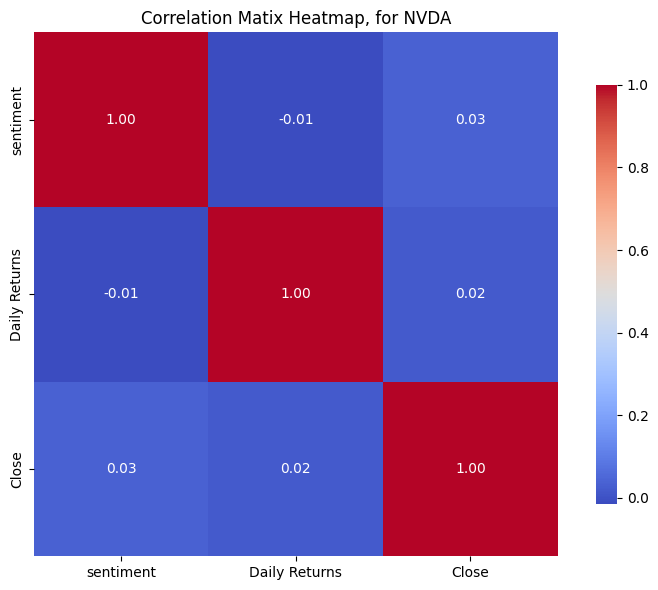

In [67]:
# Plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matix Heatmap, for NVDA')
plt.tight_layout()
plt.show()

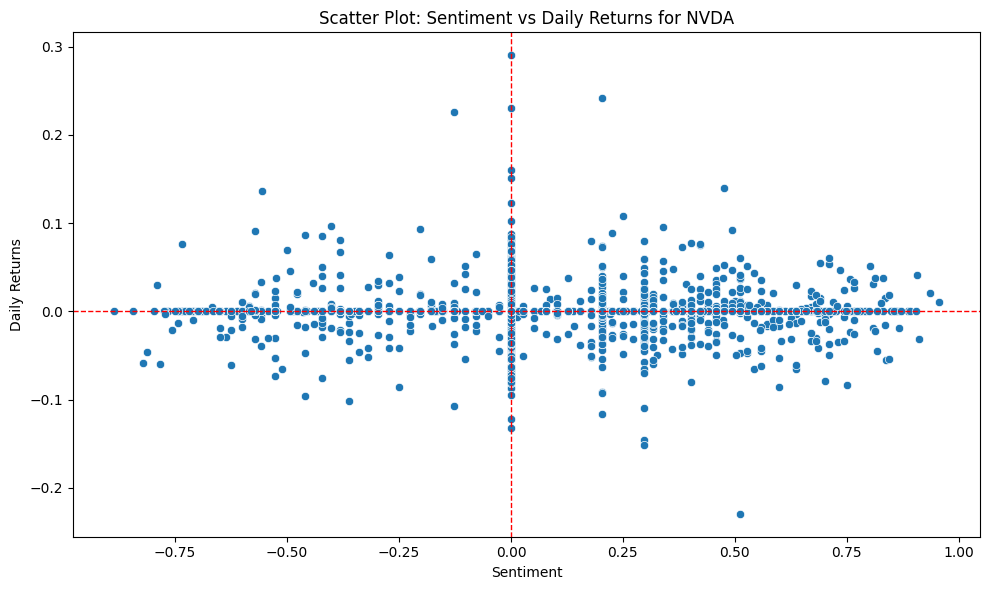

In [69]:
# scatter plot for sentiment vs daily returns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_data_nvda, x='sentiment', y='Daily Returns')
plt.title('Scatter Plot: Sentiment vs Daily Returns for NVDA')
plt.xlabel('Sentiment')
plt.ylabel('Daily Returns')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.axvline(0, color='red', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()

# Sentiment Analysis for GOOGL

In [72]:
# Load stock data for googl
goog_df = load_stock_data_from_csv("../data/yfinance_data/yfinance_data/GOOG_historical_data.csv")

In [73]:
goog_df.head()

,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
Date,,,,,,,,
2004-08-19,2.490664,2.591785,2.390042,2.499133,2.496292,897427216,0.0,0.0
2004-08-20,2.515820,2.716817,2.503118,2.697639,2.694573,458857488,0.0,0.0
2004-08-23,2.758411,2.826406,2.716070,2.724787,2.721690,366857939,0.0,0.0
2004-08-24,2.770615,2.779581,2.579581,2.611960,2.608991,306396159,0.0,0.0
2004-08-25,2.614201,2.689918,2.587302,2.640104,2.637103,184645512,0.0,0.0


#### Combine sentiment with closing price on the same day

In [74]:
# filter goog news
goog_news_df = news_df[news_df['stock'] == 'GOOG']

In [75]:
goog_news_df.head()

,headline,url,publisher,date,stock,sentiment,date_only
565380,"Facebook, Snap Analyst Projects Q2 Revenue Ups...",https://www.benzinga.com/analyst-ratings/analy...,Shanthi Rexaline,2020-06-10,GOOG,0.0000,2020-06-10
565381,How Cannabis Company Cannaphyll Is Marketing O...,https://www.benzinga.com/markets/cannabis/20/0...,Jaycee Tenn,2020-06-10,GOOG,0.1779,2020-06-10
565382,"Twitter, Square Will Mark Juneteenth As Holida...",https://www.benzinga.com/news/20/06/16218441/t...,Shivdeep Dhaliwal,2020-06-10,GOOG,0.7096,2020-06-10
565383,Price Over Earnings Overview: Alphabet,https://www.benzinga.com/intraday-update/20/06...,Benzinga Insights,2020-06-09,GOOG,0.0000,2020-06-09
565384,Google Maps To Offer Relevant Local COVID-19 I...,https://www.benzinga.com/news/20/06/16208274/g...,Shivdeep Dhaliwal,2020-06-09,GOOG,0.0000,2020-06-09


In [76]:
# Aligning sentiment scores with the stock closing prices on the same date
combined_data_goog = goog_news_df.set_index('date').join(goog_df['Close'])

In [ ]:
goog_news_df['date_for_merge'] = pd.to_datetime(goog_news_df['date_only'])

In [78]:
# convert goog_df's index to datetime if it's not already
goog_df.index = pd.to_datetime(goog_df.index)

In [80]:
combined_data_goog = pd.merge(
    goog_news_df,
    goog_df[['Close']], # Select only 'Close' from goog_df; its index 'Date' is implicitly used
    left_on='date_for_merge', # Column from the left DataFrame (goog_news_df)
    right_index=True,        # Use the index of the right DataFrame (goog_df)
    how='left'               # Keep all news entries
)

In [81]:
# clean up and rename
combined_data_goog = combined_data_goog.drop(columns=['date_for_merge', 'date_only'], errors='ignore')

In [82]:
combined_data_goog.head()

,headline,url,publisher,date,stock,sentiment,Close
565380,"Facebook, Snap Analyst Projects Q2 Revenue Ups...",https://www.benzinga.com/analyst-ratings/analy...,Shanthi Rexaline,2020-06-10,GOOG,0.0000,73.292503
565381,How Cannabis Company Cannaphyll Is Marketing O...,https://www.benzinga.com/markets/cannabis/20/0...,Jaycee Tenn,2020-06-10,GOOG,0.1779,73.292503
565382,"Twitter, Square Will Mark Juneteenth As Holida...",https://www.benzinga.com/news/20/06/16218441/t...,Shivdeep Dhaliwal,2020-06-10,GOOG,0.7096,73.292503
565383,Price Over Earnings Overview: Alphabet,https://www.benzinga.com/intraday-update/20/06...,Benzinga Insights,2020-06-09,GOOG,0.0000,72.807999
565384,Google Maps To Offer Relevant Local COVID-19 I...,https://www.benzinga.com/news/20/06/16208274/g...,Shivdeep Dhaliwal,2020-06-09,GOOG,0.0000,72.807999


In [ ]:
# Calculate daily return using pct_change() method of pandas DataFrame
combined_data_goog['Daily Returns'] = combined_data_goog['Close'].pct_change()

### Correlation Analysis for GOOG

#### Pearson Correlation

In [88]:
# Pearson correlation
correlation = combined_data_goog['sentiment'].corr(combined_data_goog['Daily Returns'])
print(f"Pearson correlation between sentiment and daily returns: {correlation}")

Pearson correlation between sentiment and daily returns: 0.015003126407045252


In [89]:
correlation = combined_data_nvda['sentiment'].corr(combined_data_nvda['Close'])
print(f"Pearson correlation between sentiment and closing price: {correlation}")

Pearson correlation between sentiment and closing price: 0.03656430626505984


Summary: The Pearson correlation between sentiment and daily returns is 0.015, indicating a weak positive correlation.

#### Spearman Correlation

In [90]:
# spearman correlation for sentiment and daily returns
correlation = combined_data_goog['sentiment'].corr(combined_data_goog['Daily Returns'], method='spearman')
print(f"Spearman correlation between sentiment and daily returns: {correlation}")

Spearman correlation between sentiment and daily returns: 0.021330574716928535


In [91]:
correlation = combined_data_nvda['sentiment'].corr(combined_data_nvda['Close'])
print(f"Pearson correlation between sentiment and closing price: {correlation}")

Pearson correlation between sentiment and closing price: 0.03656430626505984


Summary: The Spearman correlation between sentiment and daily returns is 0.021, indicating a weak positive correlation.

##### Kendall Correlation

In [92]:
# kendall correlation for sentiment and daily returns
correlation = kendalltau(combined_data_goog['sentiment'], combined_data_goog['Daily Returns'])
print(f"Kendall correlation between sentiment and daily returns: {correlation}")

Kendall correlation between sentiment and daily returns: SignificanceResult(statistic=nan, pvalue=nan)


In [94]:
# Drop rows with NaNs before computing
filtered_data = combined_data_goog[['sentiment', 'Daily Returns']].dropna()
correlation = kendalltau(filtered_data['sentiment'], filtered_data['Daily Returns'])
print(f"Kendall correlation between sentiment and daily returns (filtered): {correlation}")

Kendall correlation between sentiment and daily returns (filtered): SignificanceResult(statistic=np.float64(0.017101292886376133), pvalue=np.float64(0.4669832240923315))


Interpretation:

- The Pearson correlation between sentiment and daily returns is 0.015, indicating a weak positive correlation.
- The Spearman correlation between sentiment and daily returns is 0.021, indicating a weak positive correlation.
- The Kendall correlation between sentiment and daily returns is SignificanceResult(statistic=0.0171), pvalue=0.466), indicating a weak positive correlation.

In [95]:
# Plot correlation heatmap
corr_data = combined_data_goog[['sentiment', 'Daily Returns', 'Close']].dropna()

In [96]:
# calculate correlation matrix
correlation_matrix = corr_data.corr(method='pearson')

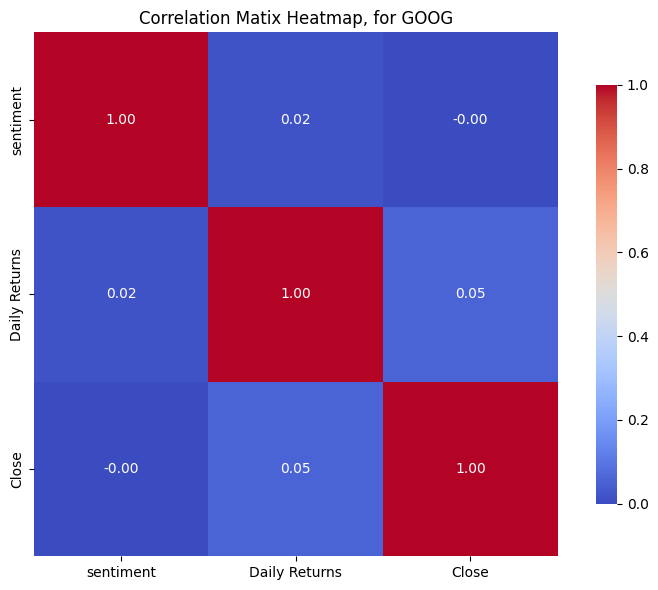

In [97]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matix Heatmap, for GOOG')
plt.tight_layout()
plt.show()

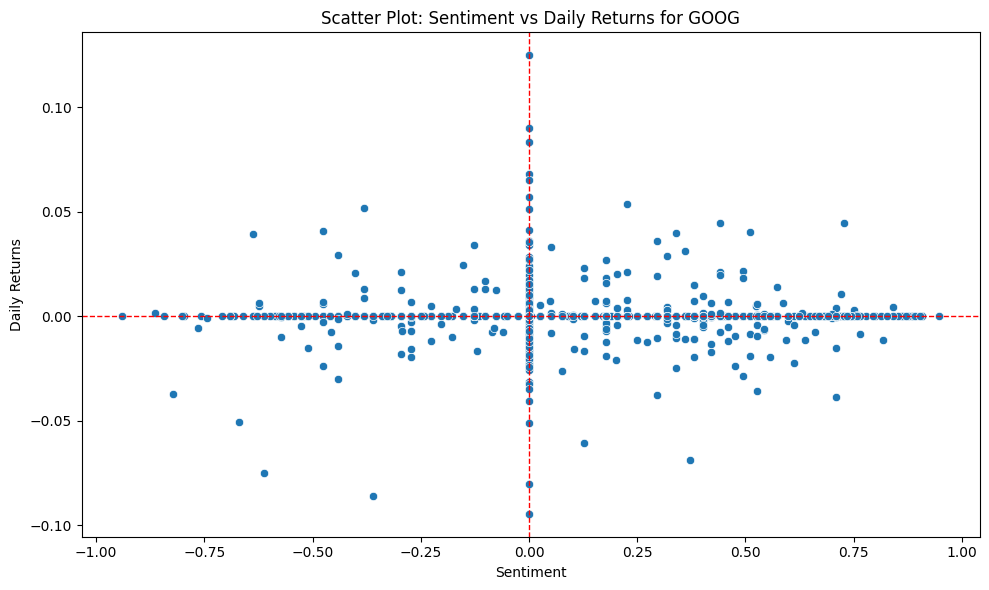

In [98]:
# scatter plot for sentiment vs daily returns
plt.figure(figsize=(10, 6))
sns.scatterplot(data=combined_data_goog, x='sentiment', y='Daily Returns')
plt.title('Scatter Plot: Sentiment vs Daily Returns for GOOG')  
plt.xlabel('Sentiment')
plt.ylabel('Daily Returns')
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.axvline(0, color='red', linestyle='--', linewidth=1)
plt.tight_layout()
plt.show()